# MODULE 9: ML ALGORITHMS COMPARISON

    *************************************************************
    Author:  Adeyemi Adedoyin Simeon
    Program: MSc, Computer Science, University of Ibadan
    Course:  Machine Learning
    Date:    26th May, 2019
    Version: 1.2
    E-mail:  adeyemi.sa1@gmail.com
    *************************************************************
    
    *Note: Please reference the author whenever and wherever you use all/portion of this code*

## Importing libraries and packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

## Loading the Dataset

In [3]:
indian_diab = pd.read_csv('pima-indians-diabetes.csv',names=['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age',
'class'])

In [5]:
indian_diab.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
indian_diab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
preg     768 non-null int64
plas     768 non-null int64
pres     768 non-null int64
skin     768 non-null int64
test     768 non-null int64
mass     768 non-null float64
pedi     768 non-null float64
age      768 non-null int64
class    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
indian_diab.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Spliting X and y Variables

In [9]:
X = indian_diab.drop('class',axis=1)
y = indian_diab['class']

## Preprocessing: Scaling the X variable

In [19]:
from sklearn.preprocessing import StandardScaler

In [21]:
scale = StandardScaler()
scaled_x = scale.fit_transform(X)

In [27]:
scaled_x = pd.DataFrame(scaled_x,columns=X.columns)

In [29]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

## Preparing the models

In [30]:
models = []
models.append(['LR',LogisticRegression()])
models.append(['KNN',KNeighborsClassifier()])
models.append(['DT',DecisionTreeClassifier(criterion='entropy')])
models.append(['NB',GaussianNB()])
models.append(['SVM',SVC()])
models.append(['RNDFOR',RandomForestClassifier(criterion='entropy')])

In [31]:
seed = 7

## Evaluating the models

In [34]:
results = []
names = []
for name,model in models:
    kfold = model_selection.KFold(n_splits=30,random_state=seed) #10-Fold
    cv_results = model_selection.cross_val_score(estimator=model,X=scaled_x,y=y, scoring='accuracy',cv=kfold)
    results.append(cv_results.mean())
    names.append(name)
    print('%s: %f (%f)' %(name, cv_results.mean(), cv_results.std()))

LR: 0.779026 (0.083849)
KNN: 0.745128 (0.105782)
DT: 0.684051 (0.108374)
NB: 0.750359 (0.080852)
SVM: 0.763333 (0.097631)
RNDFOR: 0.738769 (0.099537)


In [35]:
df2 = pd.DataFrame(list(zip(names,results)),columns=['Estimator','Accuracy Score'])

In [36]:
df2

,Estimator,Accuracy Score
0,LR,0.779026
1,KNN,0.745128
2,DT,0.684051
3,NB,0.750359
4,SVM,0.763333
5,RNDFOR,0.738769


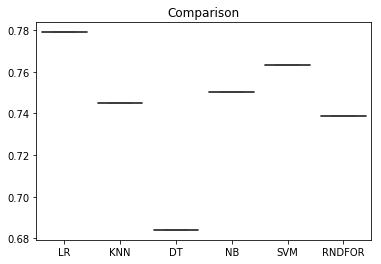

In [53]:
# boxplot algorithm comparison
plt.title('Comparison')
sns.boxplot(x=names,y=results)

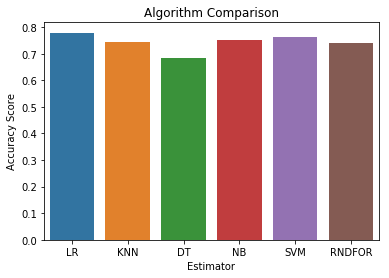

In [54]:
plt.title('Algorithm Comparison')
sns.barplot(x='Estimator',y='Accuracy Score',data=df2)

In [55]:
best_estimators = [(names[i] + ' = ' + str(max(results))) for i in range(len(results)) if results[i] == max(results)]

In [56]:
best_estimators

['LR = 0.7790256410256411']